In [ ]:
import pandas as pd

# Example dataset
data1 = pd.read_csv('EV_India.csv')
data2 = pd.read_csv('ev station in india.csv')
data3 = pd.read_csv('ev-charging-stations-india.csv')

# Display the dataset
data1.head(5)


In [11]:
# Drop the 'Sr. No.' column
data1 = data1.drop('Sr. No.', axis=1)

# Rename columns
data1 = data1.rename(columns={'State Name': 'State', 'Total Electric Vehicle': 'Electric', 'Total Non-Electric Vehicle': 'Non-Electric'})

# Display the modified DataFrame
data1.head()


,State,Electric,Non-Electric,Total
0,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,Andra Pradesh,NaN,NaN,NaN
2,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,Assam,64766,"46,77,053","47,41,819"
4,Bihar,83335,"1,04,07,078","1,04,90,413"


In [12]:
data2.head(5)

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [16]:
# Rename columns
data2 = data2.rename(columns={'State/UT': 'State'})
data2.head(5)

,State,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [25]:
data3.head(5)

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [50]:
# prompt: Using dataframe data3: Calculate  and compare which city has more charging station and
# and visvalize it

import altair as alt
# Group the data by city and count the number of charging stations in each city.
city_counts = data3.groupby('city')['name'].count().reset_index(name='count')

# Sort the cities by count in descending order.
city_counts = city_counts.sort_values('count', ascending=False)

# Select the top 10 cities with the most charging stations.
top_10_cities = city_counts.head(10)

# Create a bar chart to visualize the results.
chart = alt.Chart(top_10_cities).mark_bar().encode(
    x=alt.X('city', sort='-y'),
    y='count'
).properties(
    title='Top 10 Cities with the Most Charging Stations'
)

# Display the chart.
chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

In [51]:
# prompt: visualise which state has more charging station

# Assuming 'data3' contains information about charging stations and their states
state_counts = data3.groupby('state')['name'].count().reset_index(name='count')

# Create a bar chart to visualize the number of charging stations per state
chart = alt.Chart(state_counts).mark_bar().encode(
    x=alt.X('state', sort='-y'),
    y='count'
).properties(
    title='Number of Charging Stations by State'
)

# Display the chart
chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

In [52]:
# prompt: visualise top five Five states which has more charging stations

# Assuming 'data3' contains information about charging stations and their states
state_counts = data3.groupby('state')['name'].count().reset_index(name='count')

# Sort the states by count in descending order and select the top 5
top_5_states = state_counts.sort_values('count', ascending=False).head(5)

# Create a bar chart to visualize the top 5 states with the most charging stations
chart = alt.Chart(top_5_states).mark_bar().encode(
    x=alt.X('state', sort='-y'),
    y='count'
).properties(
    title='Top 5 States with the Most Charging Stations'
)

# Display the chart
chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

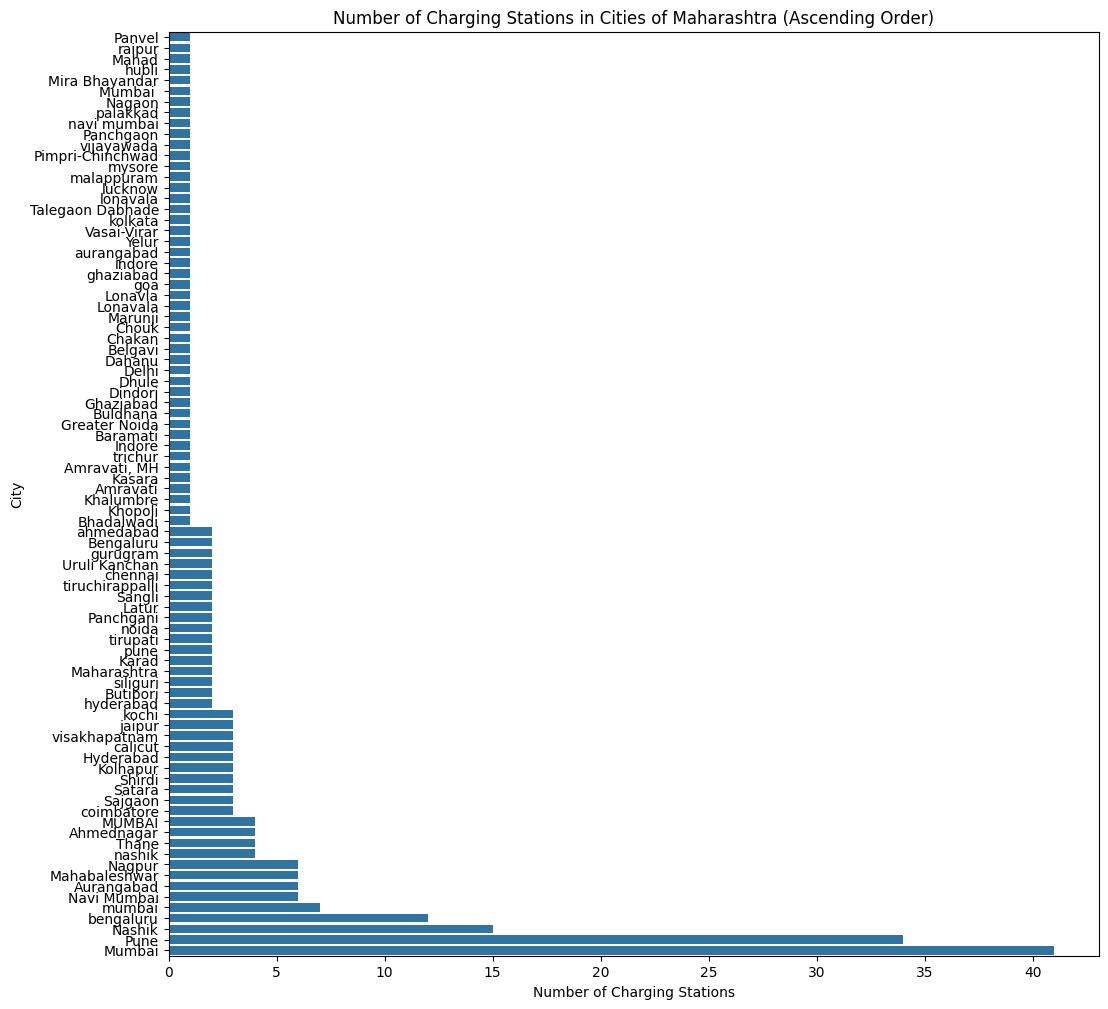

In [43]:
# prompt: Show visualise which city Add charging station from Maharashtra State

import matplotlib.pyplot as plt
# Filter data for Maharashtra state
maharashtra_data = data3[data3['state'] == 'Maharashtra']

# Group by city and count charging stations
city_counts = maharashtra_data.groupby('city')['name'].count().reset_index(name='count')

# Sort cities by charging station count in ascending order
city_counts_sorted = city_counts.sort_values('count')

# Bar plot for Maharashtra cities
plt.figure(figsize=(12, 12))
sns.barplot(x='count', y='city', data=city_counts_sorted)
plt.title('Number of Charging Stations in Cities of Maharashtra (Ascending Order)')
plt.xlabel('Number of Charging Stations')
plt.ylabel('City')
plt.show()


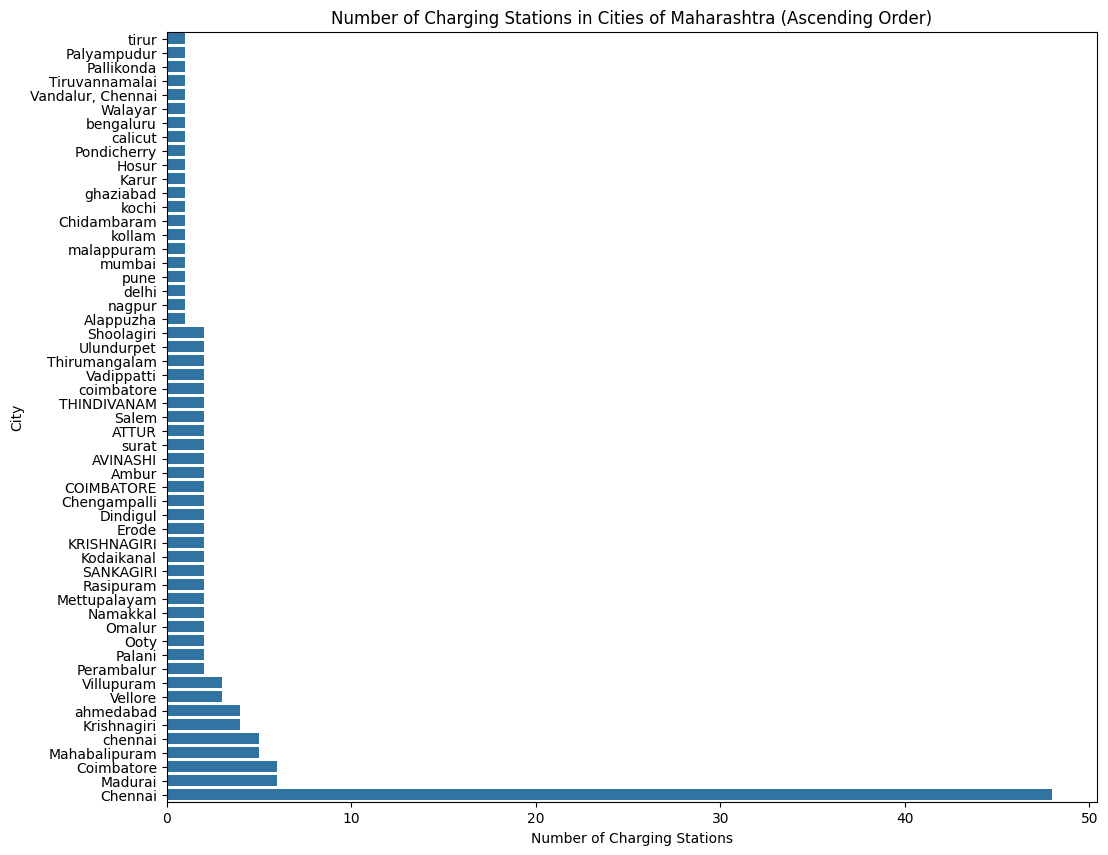

In [56]:
# prompt: Show visualise which city Add charging station from Maharashtra State

import matplotlib.pyplot as plt
# Filter data for Maharashtra state
maharashtra_data = data3[data3['state'] == 'Tamil Nadu']

# Group by city and count charging stations
city_counts = maharashtra_data.groupby('city')['name'].count().reset_index(name='count')

# Sort cities by charging station count in ascending order
city_counts_sorted = city_counts.sort_values('count')

# Bar plot for Maharashtra cities
plt.figure(figsize=(12, 10))
sns.barplot(x='count', y='city', data=city_counts_sorted)
plt.title('Number of Charging Stations in Cities of Maharashtra (Ascending Order)')
plt.xlabel('Number of Charging Stations')
plt.ylabel('City')
plt.show()


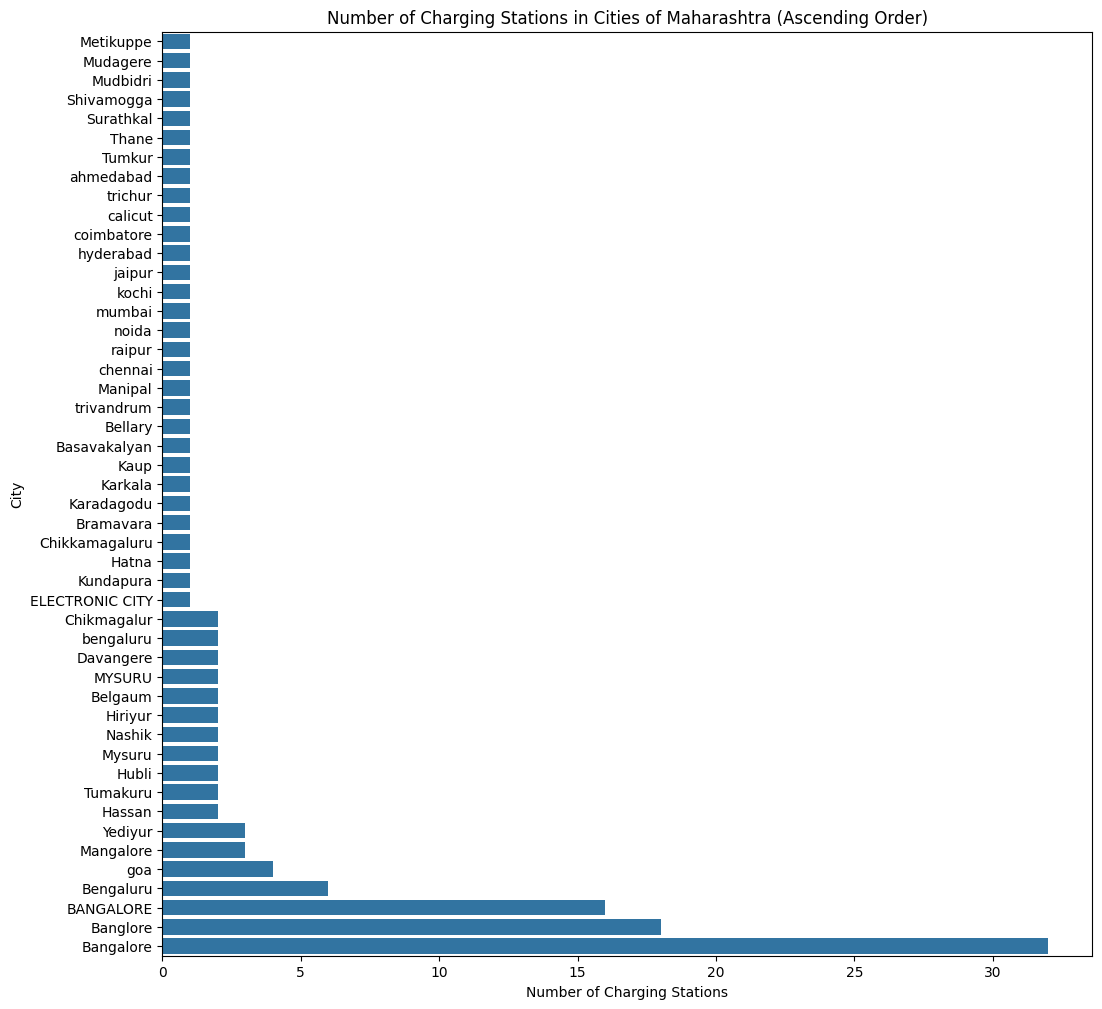

In [57]:
# prompt: Show visualise which city Add charging station from Maharashtra State

import matplotlib.pyplot as plt
# Filter data for Maharashtra state
maharashtra_data = data3[data3['state'] == 'Karnataka']

# Group by city and count charging stations
city_counts = maharashtra_data.groupby('city')['name'].count().reset_index(name='count')

# Sort cities by charging station count in ascending order
city_counts_sorted = city_counts.sort_values('count')

# Bar plot for Maharashtra cities
plt.figure(figsize=(12, 12))
sns.barplot(x='count', y='city', data=city_counts_sorted)
plt.title('Number of Charging Stations in Cities of Maharashtra (Ascending Order)')
plt.xlabel('Number of Charging Stations')
plt.ylabel('City')
plt.show()


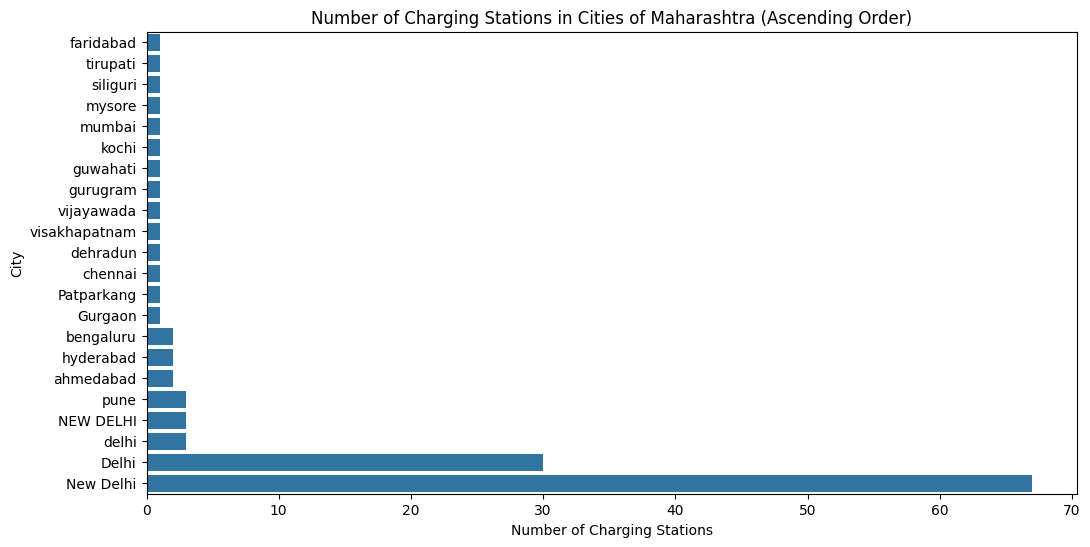

In [60]:
# prompt: Show visualise which city Add charging station from Maharashtra State

import matplotlib.pyplot as plt
# Filter data for Maharashtra state
maharashtra_data = data3[data3['state'] == 'Delhi']

# Group by city and count charging stations
city_counts = maharashtra_data.groupby('city')['name'].count().reset_index(name='count')

# Sort cities by charging station count in ascending order
city_counts_sorted = city_counts.sort_values('count')

# Bar plot for Maharashtra cities
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='city', data=city_counts_sorted)
plt.title('Number of Charging Stations in Cities of Maharashtra (Ascending Order)')
plt.xlabel('Number of Charging Stations')
plt.ylabel('City')
plt.show()


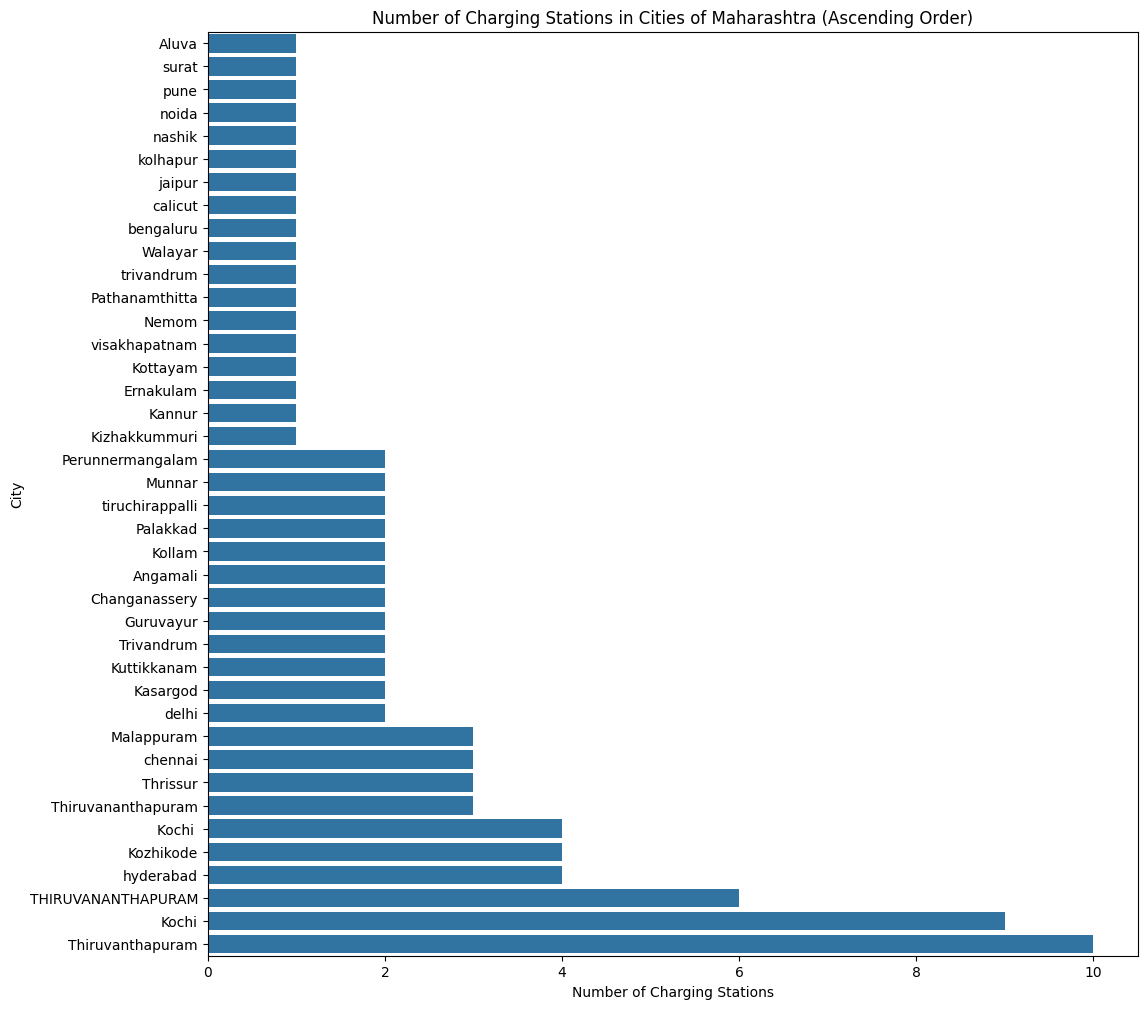

In [63]:
# prompt: Show visualise which city Add charging station from Maharashtra State

import matplotlib.pyplot as plt
# Filter data for Maharashtra state
maharashtra_data = data3[data3['state'] == 'Kerala']

# Group by city and count charging stations
city_counts = maharashtra_data.groupby('city')['name'].count().reset_index(name='count')

# Sort cities by charging station count in ascending order
city_counts_sorted = city_counts.sort_values('count')

# Bar plot for Maharashtra cities
plt.figure(figsize=(12, 12))
sns.barplot(x='count', y='city', data=city_counts_sorted)
plt.title('Number of Charging Stations in Cities of Maharashtra (Ascending Order)')
plt.xlabel('Number of Charging Stations')
plt.ylabel('City')
plt.show()
